In [110]:
import torch
from transformers import BertTokenizer, BertModel

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
import logging

In [113]:
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [114]:
text = 'Here is the sentence I want embeddings for.'
print('Original: ', text)
print('Tokenized: ', tokenizer.tokenize(text))
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text)))

Original:  Here is the sentence I want embeddings for.
Tokenized:  ['here', 'is', 'the', 'sentence', 'i', 'want', 'em', '##bed', '##ding', '##s', 'for', '.']
Token IDs:  [2182, 2003, 1996, 6251, 1045, 2215, 7861, 8270, 4667, 2015, 2005, 1012]


In [115]:
encoded_dict = tokenizer.encode_plus(
                            text,
                            add_special_tokens=True,
                            max_length=64,
                            pad_to_max_length=True,
                            return_attention_maxk=True,
                            return_tensors='pt',
                            )

print('Original: ', text)
print('Token IDs: ', encoded_dict['input_ids'])

Original:  Here is the sentence I want embeddings for.
Token IDs:  tensor([[ 101, 2182, 2003, 1996, 6251, 1045, 2215, 7861, 8270, 4667, 2015, 2005,
         1012,  102,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0]])


In [116]:
list(tokenizer.vocab.keys())[5000:5020]

['knight',
 'lap',
 'survey',
 'ma',
 '##ow',
 'noise',
 'billy',
 '##ium',
 'shooting',
 'guide',
 'bedroom',
 'priest',
 'resistance',
 'motor',
 'homes',
 'sounded',
 'giant',
 '##mer',
 '150',
 'scenes']

In [132]:
text = "After stealing money from the bank vault, the bank robber was seen fishing on the Mississippi river bank. The bank robber went home after hanging out for a bit then the embeddings happened."
marked_text = "[CLS] " + text + " [SEP]"

tokenized_text = tokenizer.tokenize(marked_text)

indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

print(tokenized_text)

for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

['[CLS]', 'after', 'stealing', 'money', 'from', 'the', 'bank', 'vault', ',', 'the', 'bank', 'robber', 'was', 'seen', 'fishing', 'on', 'the', 'mississippi', 'river', 'bank', '.', 'the', 'bank', 'robber', 'went', 'home', 'after', 'hanging', 'out', 'for', 'a', 'bit', 'then', 'the', 'em', '##bed', '##ding', '##s', 'happened', '.', '[SEP]']
[CLS]           101
after         2,044
stealing     11,065
money         2,769
from          2,013
the           1,996
bank          2,924
vault        11,632
,             1,010
the           1,996
bank          2,924
robber       27,307
was           2,001
seen          2,464
fishing       5,645
on            2,006
the           1,996
mississippi   5,900
river         2,314
bank          2,924
.             1,012
the           1,996
bank          2,924
robber       27,307
went          2,253
home          2,188
after         2,044
hanging       5,689
out           2,041
for           2,005
a             1,037
bit           2,978
then          2,059
th

In [118]:
segments_ids = [1] * len(tokenized_text)

print(segments_ids)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [119]:
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

In [120]:
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states = True)

model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [121]:
with torch.no_grad():
    
    outputs = model(tokens_tensor, segments_tensors)
    
    hidden_states = outputs[2]

In [122]:
print("Number of layers: ", len(hidden_states), " (initial embeddings + 12 BERT layers)")
layer_i = 0

print("Number of batches: ", len(hidden_states[layer_i]))
batch_i = 0

print("Number of tokens: ", len(hidden_states[layer_i][batch_i]))
token_i = 0

print("Number of hidden units: ", len(hidden_states[layer_i][batch_i][token_i]))

Number of layers:  13  (initial embeddings + 12 BERT layers)
Number of batches:  1
Number of tokens:  33
Number of hidden units:  768


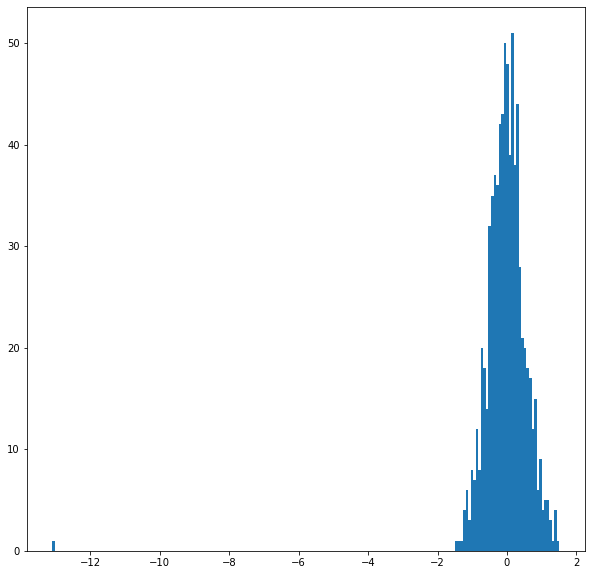

In [123]:
token_i = 5
layer_i = 5
vec = hidden_states[layer_i][batch_i][token_i]

plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.show()

In [124]:
print('       Type of hidden_states: ', type(hidden_states))
print('Tensor shape for each layer: ', hidden_states[0].size())

       Type of hidden_states:  <class 'tuple'>
Tensor shape for each layer:  torch.Size([1, 33, 768])


In [125]:
token_embeddings = torch.stack(hidden_states, dim=0)

token_embeddings.size()

torch.Size([13, 1, 33, 768])

In [126]:
token_embeddings = torch.squeeze(token_embeddings, dim=1)
token_embeddings.size()

torch.Size([13, 33, 768])

In [127]:
token_embeddings = token_embeddings.permute(1, 0, 2)
token_embeddings.size()

torch.Size([33, 13, 768])

In [128]:
token_vecs_cat = []

for token in token_embeddings:
    
    cat_vec = torch.cat((token[-1], token[-2], token[-3], token[-4]), dim=0)
    
    token_vecs_cat.append(cat_vec)
    
print('Shape is: %d x %d' % (len(token_vecs_cat), len(token_vecs_cat[0])))

Shape is: 33 x 3072


In [129]:
for i, token_str in enumerate(tokenized_text):
    print(i, token_str)

0 [CLS]
1 after
2 stealing
3 money
4 from
5 the
6 bank
7 vault
8 ,
9 the
10 bank
11 robber
12 was
13 seen
14 fishing
15 on
16 the
17 mississippi
18 river
19 bank
20 .
21 the
22 bank
23 robber
24 went
25 home
26 after
27 hanging
28 out
29 for
30 a
31 bit
32 [SEP]


In [130]:
token_vecs_cat

[tensor([-0.0756, -0.1104, -0.2482,  ..., -0.1289,  0.1924, -0.0267]),
 tensor([-0.2198, -0.1743, -0.2079,  ..., -0.7645,  0.0613, -0.5130]),
 tensor([-0.2962, -0.1225,  0.1134,  ..., -0.4554,  0.3013, -0.4266]),
 tensor([ 0.4303, -0.5760, -0.1539,  ..., -0.0116,  0.6551,  0.1940]),
 tensor([-0.3584, -0.3591,  0.3202,  ...,  0.2359,  0.2882, -1.0571]),
 tensor([-0.4706, -0.8805, -0.2219,  ...,  0.4580,  0.8436, -0.5998]),
 tensor([ 0.8812, -0.3844, -0.0615,  ...,  0.5664,  0.4199,  0.0870]),
 tensor([ 0.6422, -0.6802,  0.0587,  ..., -0.0094,  0.6543,  1.4138]),
 tensor([ 0.3488,  0.1282,  0.1586,  ..., -0.6438,  0.1559,  0.3896]),
 tensor([-0.7185, -0.7969, -0.2912,  ...,  0.0277,  0.4213, -0.5132]),
 tensor([ 8.1067e-01, -3.0953e-01,  4.4433e-03,  ...,  2.1753e-01,
          2.3836e-01, -7.2937e-05]),
 tensor([ 0.2369, -0.3897,  0.1312,  ..., -0.9324,  0.6611, -1.1054]),
 tensor([-0.4636, -0.3601,  0.2483,  ..., -0.4101,  0.0529, -0.7894]),
 tensor([-0.4173, -0.2478,  0.2103,  ...,  0

In [137]:
token_vecs = hidden_states[-2][0]

sentence_embedding = torch.mean(token_vecs, dim=0)

print("Our final sentence embedding vector of shape: ", sentence_embedding.size())

sentence_embedding

Our final sentence embedding vector of shape:  torch.Size([768])


tensor([-3.0080e-02, -4.0224e-01, -7.2126e-02,  3.3965e-01,  7.1512e-01,
        -7.5021e-02,  2.2201e-01,  8.1727e-01,  1.1844e-01, -1.5126e-01,
         3.6631e-01, -2.7246e-01, -3.8922e-01,  4.8129e-01, -6.4335e-01,
         1.0510e-01,  4.4636e-02,  1.3050e-01,  4.4962e-01,  2.5615e-01,
        -1.7316e-01, -1.3809e-01, -1.5470e-02, -1.8410e-02,  1.8184e-01,
         4.2995e-01,  1.3439e-01,  1.6523e-01, -4.2481e-01,  1.8253e-01,
         4.0812e-01,  1.9076e-01,  6.1621e-01, -4.4735e-01,  7.0374e-02,
        -4.7848e-01, -1.0551e-01, -7.2108e-02, -2.3482e-01,  6.6996e-01,
        -2.6026e-01, -1.1057e-01, -2.7519e-02, -6.1230e-02,  2.3163e-01,
        -2.4750e-01,  2.0334e-01, -4.7155e-01, -1.6020e-01, -4.6486e-01,
        -3.2217e-01,  3.3791e-01, -5.1706e-01, -2.7718e-01,  1.7601e-01,
         6.2790e-01, -3.6744e-01, -7.8739e-01,  1.3813e-01, -2.1470e-02,
         1.1718e-01, -1.5134e-01,  1.5122e-01, -4.0524e-01, -3.4906e-01,
        -3.9230e-01,  3.5299e-01, -4.7119e-02, -1.1